# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

<Axes: title={'center': 'Distribution of 8th Grade Reading Scores'}, ylabel='Frequency'>

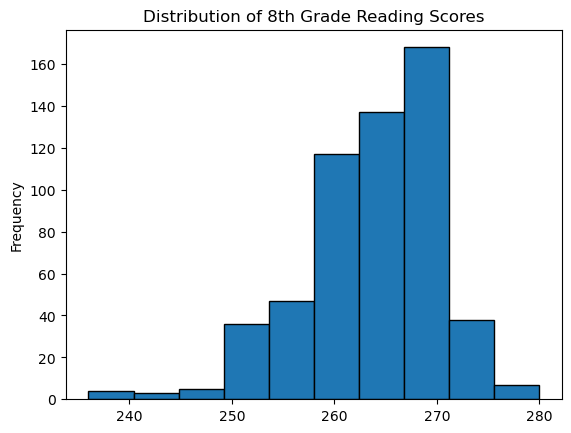

In [107]:
df = pd.read_csv('states_edu.csv')
df.head()

df.AVG_READING_8_SCORE.plot.hist(title="Distribution of 8th Grade Reading Scores", edgecolor="black")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [108]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Math

How many years of data are logged in our dataset? 

In [109]:
print(df['YEAR'])
df['YEAR'].describe

x = 2019 - 1991
print('years: ', x)


0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64
years:  28


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [110]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)


all_scores = df['AVG_MATH_4_SCORE'].to_list()
all_states = df['STATE'].to_list()

michigan_list = []
ohio_list = []
i = 0
while i < len(all_states):
    if all_states[i] == 'MICHIGAN':
        michigan_list.append(i)
    if all_states[i] == 'OHIO':
        ohio_list.append(i)
    i += 1
    
print(michigan_list, ohio_list)
mi_sum = 0
oh_sum = 0
j = 0
while j < len(michigan_list):
    mi_sum += all_scores[michigan_list[j]]
    oh_sum += all_scores[ohio_list[j]]
    j += 1

mi_avg = mi_sum / len(michigan_list)
oh_avg = oh_sum / len(ohio_list)

print('Michigan: ', mi_avg, 'Ohion: ', oh_avg)
print('Ohio has the higher scores')
    

[19, 60, 105, 156, 207, 258, 309, 360, 411, 462, 535] [30, 71, 118, 169, 220, 271, 322, 373, 424, 475, 549]
Michigan:  234.36363636363637 Ohion:  239.45454545454547
Ohio has the higher scores


Find the average for your outcome score across all states in 2019

In [111]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)


all_scores = df['AVG_MATH_4_SCORE'].to_list()
all_states = df['STATE'].to_list()
all_years = df['YEAR'].to_list()

specific_year_list = []
i = 0
while i < len(all_years):
    if all_years[i] == 2019:
        specific_year_list.append(i)
    i += 1
total_score = 0
j = 0
while j < len(specific_year_list):
    total_score += all_scores[specific_year_list[j]]
    j += 1

avg = total_score / len(specific_year_list)

print('Average outcome score for grade 4 math in 2019 across all states: ', avg)



Average outcome score for grade 4 math in 2019 across all states:  239.9433962264151


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [112]:

df.groupby(["STATE"])["AVG_MATH_4_SCORE"].mean()


STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [113]:
# let's create a new column which represents expenditure per student
df['TOTAL_REVENUE_SPENT_PERCENT'] = df['TOTAL_EXPENDITURE'] / df['TOTAL_REVENUE']
df['STATE_REVENUE_SPENT_PERCENT'] = df['TOTAL_EXPENDITURE'] / df['STATE_REVENUE']
df['TOTAL_PERCENT_SPENT_ON_EDU'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df['TOTAL_PERCENT_SPENT_ON_SUPPORT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df.dropna()
print(df['TOTAL_PERCENT_SPENT_ON_EDU'])




0       0.558333
2       0.422130
3       0.553248
4       0.529091
5       0.503079
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: TOTAL_PERCENT_SPENT_ON_EDU, Length: 565, dtype: float64


Feature engineering justification: I found created four new columns: TOTAL_REVENUE_SPENT_PERCENT is the percent spent by a state out of the total revenue; STATE_REVENUE_SPENT_PERCENT is the percent spent by the state out of their total state revenue; TOTAL_PERCENT_SPENT_ON_EDU is the percent spent on education out of the total money spent by a state; TOTAL_PERCENT_SPENT_ON_SUPPORT is the percent spent on support systems out of the total money spent by a state. 
Some states will make more money than others so by turning the amount they spent on education into percents can make the data more comparable from state to state.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='TOTAL_PERCENT_SPENT_ON_EDU'>

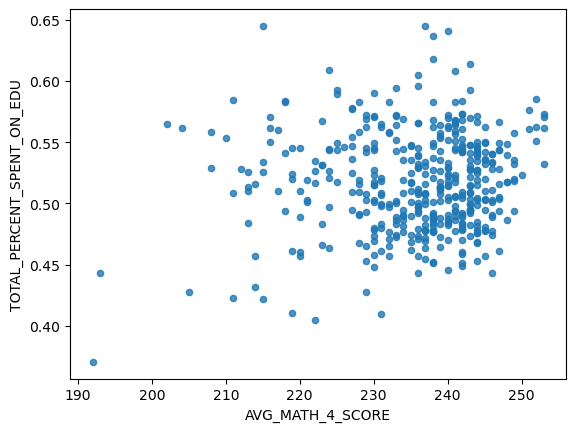

In [114]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='TOTAL_PERCENT_SPENT_ON_EDU', alpha=0.8)

The scatter plot above shows the relationship between the average amount of money spent on education by each state vs their average math scores for grade fours. The graph shows that their isn't much of a difference in math scores based on how much money is spent by each state, and it even shows that the highest scores are produced by states that didn't spend the most on edu. I would say there may not be a ton of correlation between these two variables as I don't see a sufficient way to make a line of best fit of any type.

**Visualization 2**

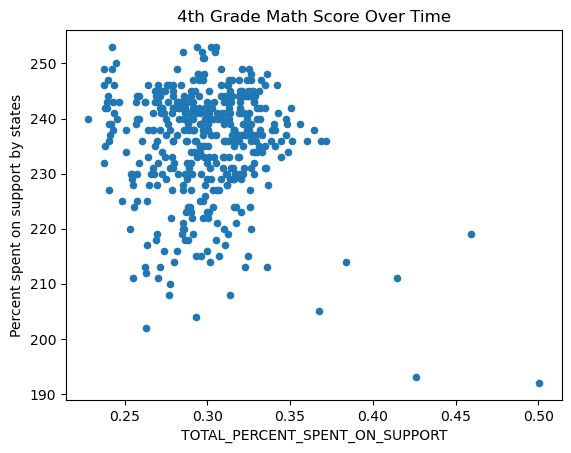

In [115]:
df.plot(kind='scatter', x='TOTAL_PERCENT_SPENT_ON_SUPPORT', y='AVG_MATH_4_SCORE')
plt.ylabel('Percent spent on support by states')
plt.title('4th Grade Math Score Over Time')
plt.show()

This graph is a bit harder to read as I couldn't find a way to make my dataset smaller. Specifically I wish I averaged the scores for each percentage point of money spent on support, but I think because all the percentages of money spent on support are different by just a little I would need to round the column to do this. Disregarding this flaw, this graph shows that the less money spent on support shows higher test scores. Or more specifically that a state spent half their spending money on support and showed the lowest math test scores amongst fourth grades. There is a wide range of test scores from 25% to 35% of the total money spent by states on support. Overall this graph shows that the amount of money spent on support by states doesn't have much of an impact on the math test scores of fourth graders.

The paragraph above was based on a line graph made from the same data, so it was hard to read. Once I converted it to the graph above the data is much easier to read. However, based on this graph I still came to the same conclusion that the money spent on support by states didn't play a role in how well fourth graders performed on math tests. The same outlier remains at .50 of the x-axis showing that the state that spent the most on support had the lowest test scores amongst fourth graders. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X = df[['ENROLL_4','AVG_MATH_4_SCORE','TOTAL_PERCENT_SPENT_ON_SUPPORT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [139]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [140]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [141]:
# create your model here
model = LinearRegression()

In [142]:
model.fit(X_train, y_train)

LinearRegression()

In [143]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [144]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

75.10003733035188
[-5.61267518e-06  9.06756976e-01 -3.22705253e+01]
0.8646242467175898
-0.17621344433686487


4.13290009406553

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

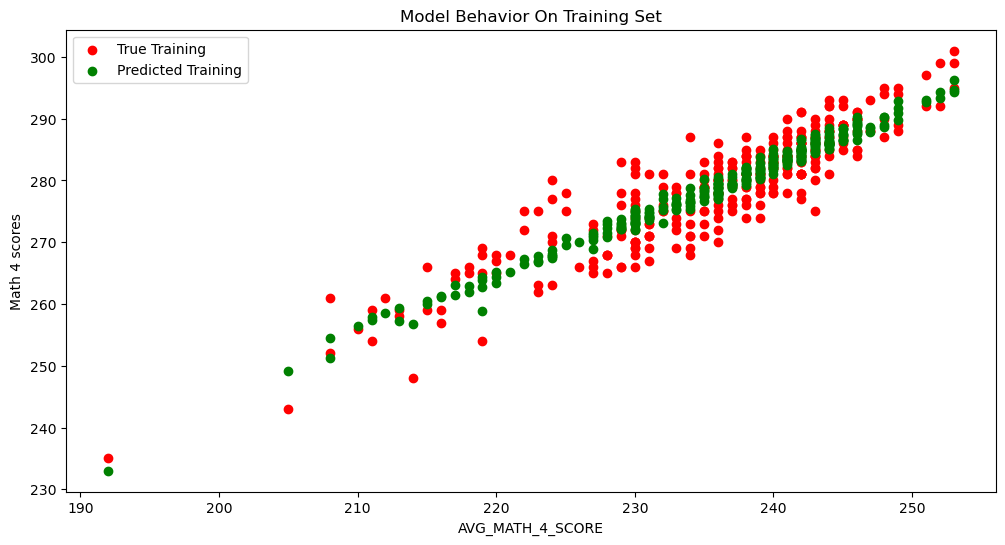

In [145]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

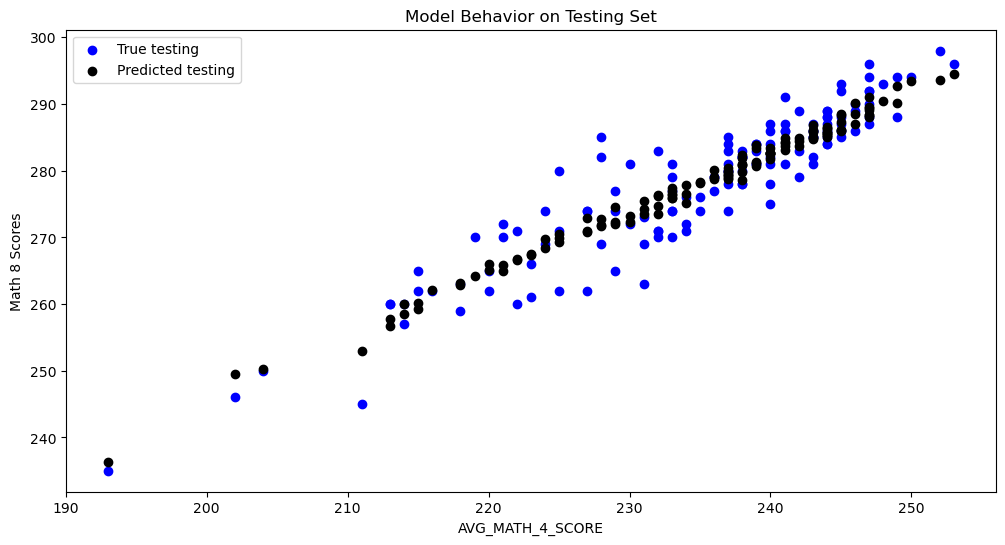

In [146]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Scores')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I decided to make a ML model comparing fourth grade and eighth grade math scores based on the percent of money spent on support by each state (at least that's my understanding of the model or what I was trying to create). Based on previous graphs I found that there wasn't much correlation between the amount of money spent on support systems by states and fourth grade math scores and I think this is prevelant in the testing data. The testing data plot shows a lot of data points not falling into the training model: a little under half of the data is outside of the model. Thus I'd say that this model yeilded an inadequate performance to correctly predict the math scores of students based on the percent of money spent on support systems. I think this is due to the fact that there wasn't much correlation between these datapoints already, so it makes sense that a ML system will make false predicitions. 